In [3]:
#1. How do you create a simple perceptron for basic binary classification?

import numpy as np

def step_function(x):
    return 1 if x >= 0 else 0

def perceptron(X, W, b):
    return step_function(np.dot(W, X) + b)

X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 0, 0, 1])  # AND logic

W = np.random.rand(2)
b = np.random.rand(1)

learning_rate = 0.1
for epoch in range(10):
    for i in range(len(X_train)):
        y_pred = perceptron(X_train[i], W, b)
        error = y_train[i] - y_pred
        W += learning_rate * error * X_train[i]
        b += learning_rate * error

print("Final weights:", W)
print("Final bias:", b)



Final weights: [0.18077232 0.22248933]
Final bias: [-0.37378048]


In [4]:
# 2. How can you build a neural network with one hidden layer using Keras?

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(16, activation='relu', input_shape=(4,)),  # Hidden layer with 16 neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97 (388.00 B)

 Trainable params: 97 (388.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 3. How do you initialize weights using the Xavier (Glorot) initialization method in Keras?

from tensorflow.keras.initializers import GlorotUniform

model = Sequential([
    Dense(16, activation='relu', kernel_initializer=GlorotUniform(), input_shape=(4,)),
    Dense(1, activation='sigmoid')
])


In [6]:
# 4. How can you apply different activation functions in a neural network in Keras?
from tensorflow.keras.layers import Activation

model = Sequential([
    Dense(32, input_shape=(4,)),
    Activation('relu'),  
    Dense(1),
    Activation('sigmoid')  
])


In [7]:
# 5. How do you add dropout to a neural network model to prevent overfitting?
from tensorflow.keras.layers import Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dropout(0.5),  # 50% dropout
    Dense(1, activation='sigmoid')
])


In [8]:
# 6. How do you manually implement forward propagation in a simple neural network?
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Example neural network with one hidden layer
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1  # Hidden layer computation
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2  # Output layer computation
    A2 = sigmoid(Z2)
    return A2

# Example weights
W1 = np.random.randn(3, 2)
b1 = np.random.randn(3, 1)
W2 = np.random.randn(1, 3)
b2 = np.random.randn(1, 1)

# Example input
X = np.array([[0.5], [0.2]])
output = forward_propagation(X, W1, b1, W2, b2)
print("Output:", output)


Output: [[0.51048575]]


In [9]:
# 7. How do you add batch normalization to a neural network model in Keras?
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Dense(64, input_shape=(4,)),
    BatchNormalization(),
    Activation('relu'),
    Dense(1, activation='sigmoid')
])


Epoch 1/50


C:\Users\subha\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5871 - loss: 0.6656 - val_accuracy: 0.7100 - val_loss: 0.6084
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7562 - loss: 0.5619 - val_accuracy: 0.7550 - val_loss: 0.5450
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8098 - loss: 0.4947 - val_accuracy: 0.7950 - val_loss: 0.5016
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8321 - loss: 0.4504 - val_accuracy: 0.8050 - val_loss: 0.4699
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8379 - loss: 0.4195 - val_accuracy: 0.8150 - val_loss: 0.4458
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8511 - loss: 0.3874 - val_accuracy: 0.8350 - val_loss: 0.4274
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8712 - loss: 0.3570 - val_accuracy: 0.8450 - val_loss: 0.4123
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8566 - loss: 0.3640 - val_accuracy: 0.8500 - val_loss: 0.3999
Ep

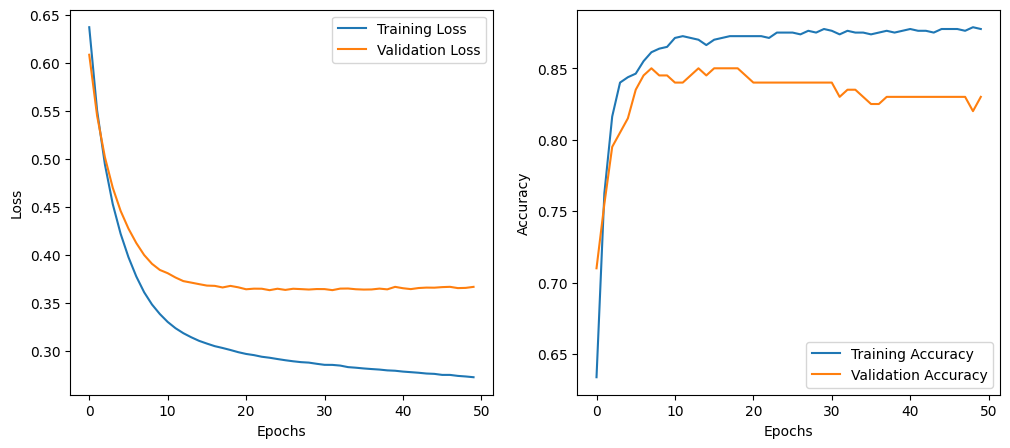

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), batch_size=32, verbose=1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [13]:
# 9. How can you use gradient clipping in Keras to control the gradient size and prevent exploding gradients?
from tensorflow.keras.optimizers import Adam

# Apply gradient clipping
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)  # Clip gradients to norm 1.0
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [14]:
# 10. How can you create a custom loss function in Keras?
from tensorflow.keras.losses import Loss
import tensorflow as tf

class CustomLoss(Loss):
    def call(self, y_true, y_pred):
        return tf.reduce_mean(tf.square(y_true - y_pred))  # Mean Squared Error (MSE)

# Using the custom loss function
model.compile(optimizer='adam', loss=CustomLoss(), metrics=['accuracy'])


In [16]:
# 11. How can you visualize the structure of a neural network model in Keras?

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) for `plot_model` to work.
